# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfb=pd.read_csv('BankData.csv')

#### Checking the data

In [3]:
dfb.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
dfb.shape

(210, 7)

In [5]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


#### Checking the Summary Statistic

In [6]:
dfb.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


#### Checking for Duplicates

In [7]:
dups = dfb.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

dfb[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


#### There are no duplicate records in the data set
-------------------------------------------------------------------------------------------------------------

#### Outlier Treatment
#### To check for outliers, we will be plotting the box plots.

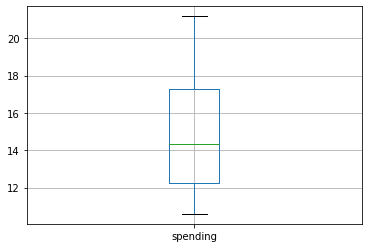

In [234]:
dfb.boxplot(column=['spending'])
plt.show()

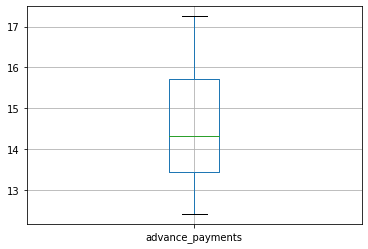

In [9]:
dfb.boxplot(column=['advance_payments'])
plt.show()

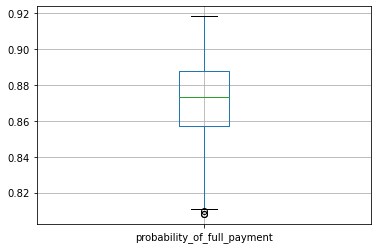

In [10]:
dfb.boxplot(column=['probability_of_full_payment'])
plt.show()

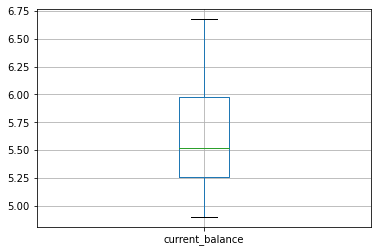

In [11]:
dfb.boxplot(column=['current_balance'])
plt.show()

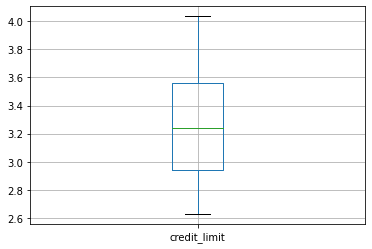

In [12]:
dfb.boxplot(column=['credit_limit'])
plt.show()

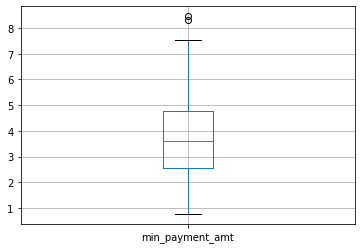

In [13]:
dfb.boxplot(column=['min_payment_amt'])
plt.show()

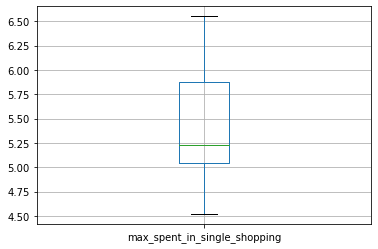

In [14]:
dfb.boxplot(column=['max_spent_in_single_shopping'])
plt.show()

Probability_of_full_payment and min_payment_amt have outliers. These outlier values need to be dropped and replaced using the IQR

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [17]:
lrprobability,urprobability=remove_outlier(dfb['probability_of_full_payment'])
dfb['probability_of_full_payment']=np.where(dfb['probability_of_full_payment']>urprobability,urprobability,dfb['probability_of_full_payment'])
dfb['probability_of_full_payment']=np.where(dfb['probability_of_full_payment']<lrprobability,lrprobability,dfb['probability_of_full_payment'])

lrmin,urmin=remove_outlier(dfb['min_payment_amt'])
dfb['min_payment_amt']=np.where(dfb['min_payment_amt']>urmin,urmin,dfb['min_payment_amt'])
dfb['min_payment_amt']=np.where(dfb['min_payment_amt']<lrmin,lrmin,dfb['min_payment_amt'])

dfb.shape

(210, 7)

#### Boxplots after Outlier Treatment

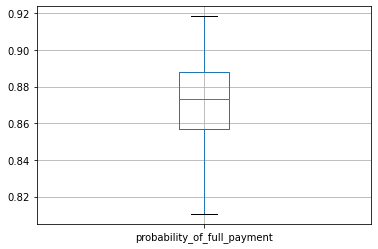

In [18]:
dfb.boxplot(column=['probability_of_full_payment'])
plt.show()

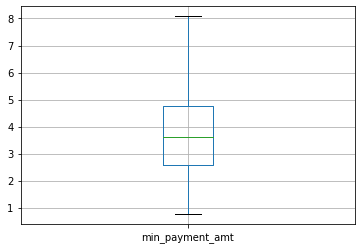

In [19]:
dfb.boxplot(column=['min_payment_amt'])
plt.show()

#### Check for missing value

In [20]:
dfb.isnull().sum()[dfb.isnull().sum()>0]

Series([], dtype: int64)

There are no missing values in dataset

### Exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)
### Univariate Analysis

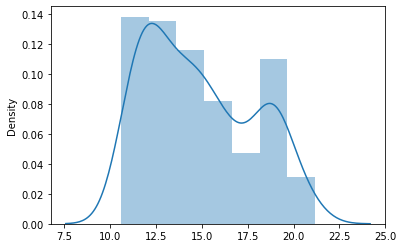

In [23]:
sns.distplot(x=dfb.spending, kde = True)  # histogram of spending
plt.show()

From above figure, we can say that the spending parameter is right skewed

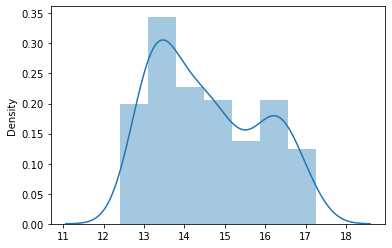

In [25]:
sns.distplot(x=dfb.advance_payments, kde = True)  # histogram of advance_payments
plt.show()

From above figure, we can say that the advance_payments parameter is right skewed

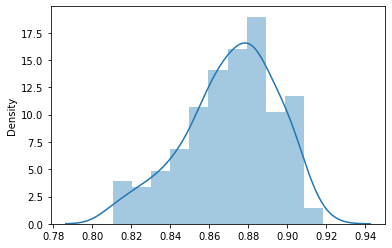

In [27]:
sns.distplot(x=dfb.probability_of_full_payment, kde = True)  # histogram of probability_of_full_payment
plt.show()

From above figure, we can say that the probability_of_full_payment parameter is left skewed

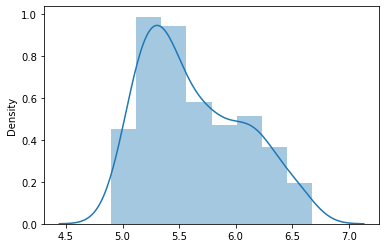

In [29]:
sns.distplot(x=dfb.current_balance, kde = True)  # histogram of current_balance
plt.show()

From above figure, we can say that the current_balance parameter is right skewed

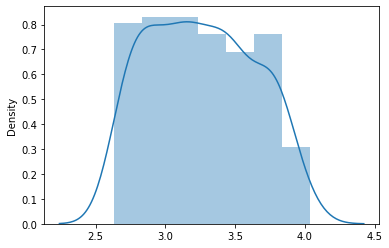

In [31]:
sns.distplot(x=dfb.credit_limit, kde = True)  # histogram of credit_limit
plt.show()

From above figure, we can say that the credit_limit parameter is normally distributed

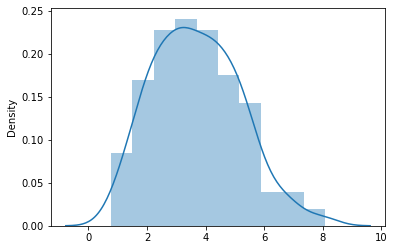

In [35]:
sns.distplot(x=dfb.min_payment_amt, kde = True)  # histogram of min_payment_amt
plt.show()

From above figure, we can say that the min_payment_amt parameter is normally distributed

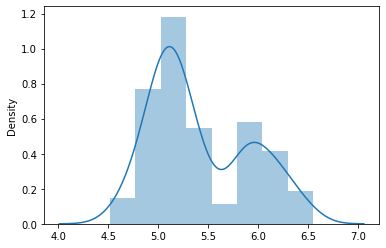

In [37]:
sns.distplot(x=dfb.max_spent_in_single_shopping, kde = True)  # histogram of max_spent_in_single_shopping
plt.show()

From above figure, we can say that the max_spent_in_single_shopping parameter is right skewed

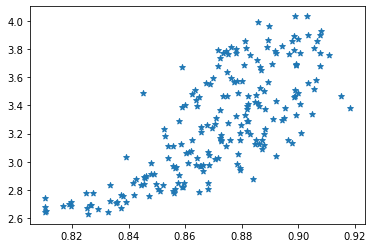

In [38]:
plt.scatter(x=dfb["probability_of_full_payment"], y=dfb["credit_limit"], marker='*')
plt.show()

### Bivariate Analysis

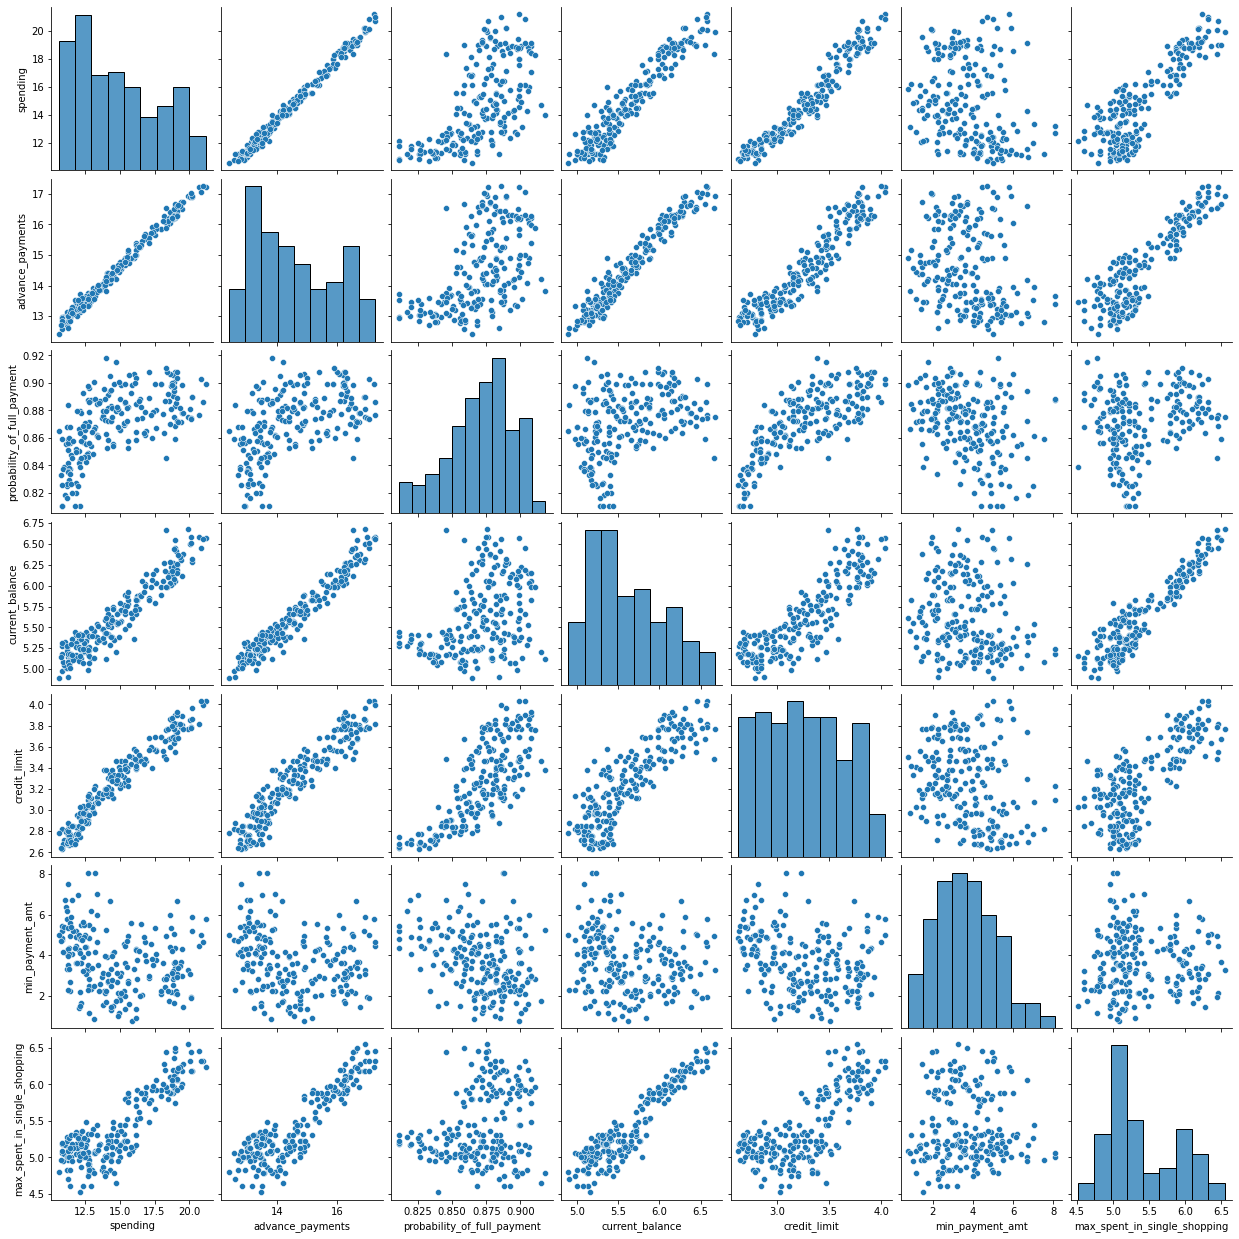

In [39]:
sns.pairplot(dfb)
plt.show()

#### Observation
    Strong positive correlation between 
        - spending & advance_payments, 
        - advance_payments & current_balance, 
        - credit_limit & spending
        - spending & current_balance
        - credit_limit & advance_payments
        - max_spent_in_single_shopping & current_balance

### Multivariate Analysis

#### Correlation Heatmap

In [40]:
dfb.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


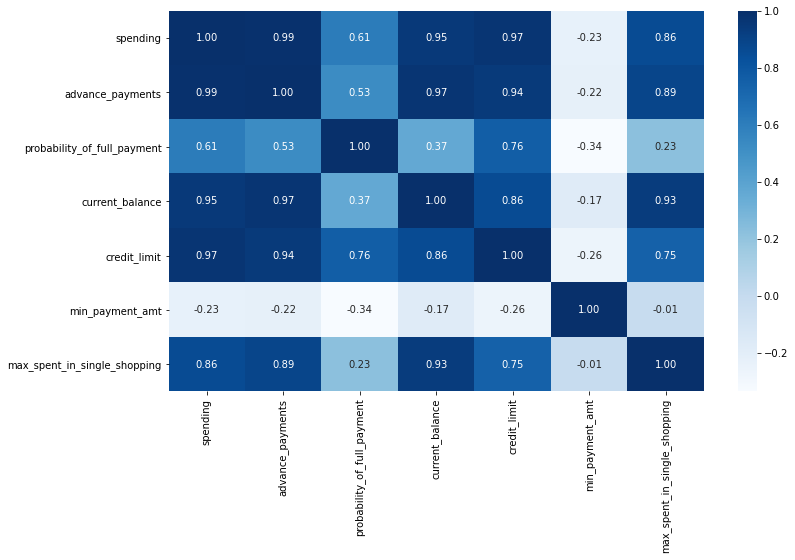

In [41]:
plt.figure(figsize=(12,7))
sns.heatmap(dfb.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

Significant correlation among independent attributes from high to low values

    spending - advance_payments	0.994341
    advance_payments - current_balance	0.972422
    credit_limit - spending	0.970771
    spending - current_balance	0.949985
    credit_limit - advance_payments	0.944829
    max_spent_in_single_shopping - current_balance	0.932806
    advance_payments - max_spent_in_single_shopping	0.890784
    spending - max_spent_in_single_shopping	0.863693
    current_balance - credit_limit	0.860415
    probability_of_full_payment - credit_limit	0.761635
    max_spent_in_single_shopping - credit_limit	0.749131
    spending - probability_of_full_payment	0.608288
    advance_payments - probability_of_full_payment	0.529244
    current_balance - probability_of_full_payment	0.367915
    probability_of_full_payment - min_payment_amt	0.331471

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

We need to do scaling as the values of the variables are different. 
Spending, probability_of_full_payment are in different values and this may get more weightage when we process the data.

We can use StandardScaler method to scale the dataset. It works to process the data in same scale.

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
std_scale = StandardScaler()

In [48]:
df1=dfb.copy()
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837


In [49]:
df1['spending'] = std_scale.fit_transform(df1[['spending']])
df1['advance_payments'] = std_scale.fit_transform(df1[['advance_payments']])
df1['probability_of_full_payment'] = std_scale.fit_transform(df1[['probability_of_full_payment']])
df1['current_balance']= std_scale.fit_transform(df1[['current_balance']])
df1['credit_limit'] = std_scale.fit_transform(df1[['credit_limit']])
df1['min_payment_amt'] = std_scale.fit_transform(df1[['min_payment_amt']])
df1['max_spent_in_single_shopping'] = std_scale.fit_transform(df1[['max_spent_in_single_shopping']])

In [50]:
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

### Creating the Dendrogram
#### Importing dendrogram and linkage module

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### Choosing average linkage method

In [52]:
link_method = linkage(df1, method = 'average')

In [54]:
labelList = np.array(df1.probability_of_full_payment)
labelList

array([ 1.77627997e-01,  1.50507052e+00,  5.05234005e-01, -2.57139059e+00,
        1.19873763e+00,  6.96692061e-01, -8.81773247e-01,  1.43591010e-01,
       -3.11653702e-01, -8.47736259e-01,  6.58400450e-01, -7.71153037e-01,
       -1.13705066e+00, -9.89225282e-02,  3.52067560e-01,  3.22285196e-01,
        1.37743182e+00, -5.11621005e-01, -1.28704893e-01, -9.32828729e-01,
       -6.09477345e-01, -9.79629587e-01,  1.20299225e+00, -9.75374964e-01,
        1.17320989e+00,  4.79706264e-01,  2.44615525e-02, -2.21772502e+00,
       -1.78375342e+00, -4.94602511e-01,  2.07410362e-01, -8.05190025e-01,
       -6.47768956e-01,  1.18171914e+00, -1.85608202e+00, -1.94542912e+00,
       -6.47768956e-01, -2.47834350e-01, -2.17943341e+00,  2.96757455e-01,
        4.24396159e-01,  1.04131656e+00, -2.64852844e-01,  4.28650782e-01,
       -2.56660414e+00, -1.28704893e-01, -2.05288115e-01,  6.11599592e-01,
        1.56038063e+00,  8.79640870e-01, -1.07323130e+00,  1.13491828e+00,
        1.16895527e+00,  

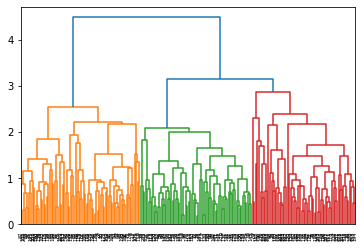

In [55]:
dend = dendrogram(link_method)

#### Cutting the Dendrogram with suitable clusters

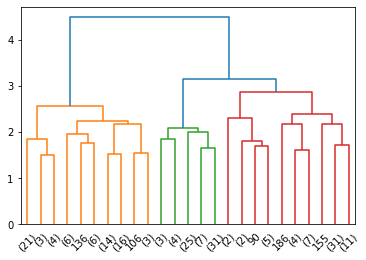

In [56]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25, 
                 )

#### Importing fcluster module to create clusters

In [57]:
from scipy.cluster.hierarchy import fcluster

In [58]:
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [59]:
dfb['clusters'] = clusters

In [60]:
dfb.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


#### Cluster Frequency

In [61]:
dfb.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

#### Cluster Profiles

In [64]:
aggdata=dfb.groupby('clusters').mean()
aggdata['Freq']=dfb.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

#### Creating Clusters using KMeans
#### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [65]:
from sklearn.cluster import KMeans 

In [66]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [67]:
k_means.fit(df1)

KMeans(n_clusters=2, random_state=1)

In [68]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [70]:
k_means.inertia_

659.1474009548498

In [71]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df1)
k_means.inertia_

1469.9999999999998

In [72]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1)
k_means.inertia_

430.298481751223

In [73]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df1)
k_means.inertia_

371.221763926848

In [74]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df1)
k_means.inertia_

326.8846407681858

In [75]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df1)
k_means.inertia_

290.15133123739645

In [76]:
wss =[] 

In [77]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df1)
    wss.append(KM.inertia_)

In [78]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 326.8846407681858,
 290.15133123739645,
 263.0291032947617,
 242.8107073317113,
 221.4875969822111,
 206.32904650770408]

In [79]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

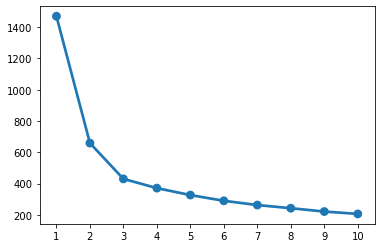

In [80]:
sns.pointplot(x=a, y=wss)

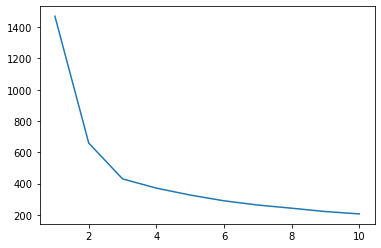

In [81]:
plt.plot(range(1,11), wss)

#### Cluster evaluation for 3 clusters: the silhouette score

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [83]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df1)
labels = k_means.labels_

In [84]:
silhouette_score(df1,labels,random_state=1)

0.46560100442748986

In [86]:
silhouette_samples(df1,labels).min()

-0.0056773797277176906

In [87]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df1)
labels = k_means.labels_

In [91]:
silhouette_score(df1,labels,random_state=1)

0.4008059221522216

In [92]:
silhouette_samples(df1,labels).min()

0.002768541128616533

In [94]:
dfb["Clus_kmeans3"] = labels
dfb.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [96]:
dfb.Clus_kmeans3.value_counts().sort_index()

0    67
1    72
2    71
Name: Clus_kmeans3, dtype: int64

In [99]:
clust_profile=dfb
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=dfb.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,freq
Clus_kmeans3,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,2.097222,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.676056,71


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Cluster Group Profiles    
Cluster 1 : High Spending    
Cluster 2 : Low Spending    
Cluster 3 : Medium Spending

Cluster 1: This cluster customers with medium range in "minimum paid by the customer while making payments for purchases made monthly" but highest in Probability of full payment, spending, current balance, credit limit and Maximum amount spent in single purchase.      

Cluster 2: This cluster customers with less range in Probability of full payment, spending, current balance, credit limit and Maximum amount spent in single purchase,  and high only in "minimum paid by the customer while making payments for purchases made monthly"    

Cluster 3: This cluster customers with less range in "minimum paid by the customer while making payments for purchases made monthly" but medium range in Probability of full payment, spending, current balance, credit limit and Maximum amount spent in single purchase.

#### Promotional strategies for each cluster

#### Cluster 1 : High Spending Group
- We can give addon points and offers on the best brands to increase their purchases.
- Max_spent_in_single_shopping is high for this group, so the offered points/discount is give best effects to do next purchase with full payment
- We can increase the credit limit to give the option to utilize more 
- Probability of full payment is high so that we can Offer loan for which customers with good repayment record. 

#### Cluster 2 : Low Spending Group
- This customers have minimum paid by the customer while making payments for purchases. So that we need to give reminders for payments. Also, other parameters are in medium range (Probability of full payment, spending, current balance, credit limit and Maximum amount spent in single purchase). So, we can Offer reward points for next purchase on early payments to improve their payment rate.
- This offers will also help to increase their spending habits on new tries, daily utlities and more.
- Cashback offers also could be consider.

#### Cluster 3 : Medium Spending Group
- This group of customers are target customers. Because they are maintaining good credit score with paying bills and doing purchases. So we can decrease interest rate on the credit cards to spend more. 
- Offer high credit limit to increase transcations with low interest.
- Also, we can offer on the best brands for Accessories and daily utlities, travel and shopping cash backs/Flat % offers to spend more

------------------------------------------------------------------------------------------------------

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

#### Importing all required Libraries

In [100]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#### Loading the data set

In [101]:
dfi=pd.read_csv('insurancedata.csv')

#### Basic Data Exploration

In [102]:
dfi.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [103]:
dfi.shape

(3000, 10)

In [104]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [105]:
dfi.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [106]:
dups = dfi.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

dfi[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


#### There were 139 duplicates found. But there is no customer ID or any unique identifier available to differentiate customers. So, I am not dropping them off.

### Outlier Treatment
#### To check for outliers using plotting the box plots.

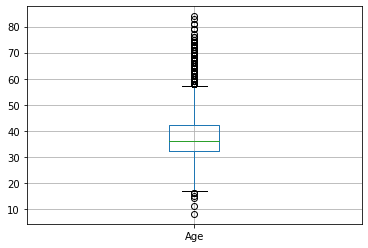

In [107]:
dfi.boxplot(column=['Age'])
plt.show()

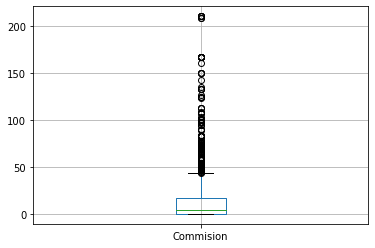

In [108]:
dfi.boxplot(column=['Commision'])
plt.show()

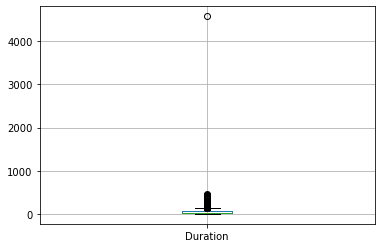

In [109]:
dfi.boxplot(column=['Duration'])
plt.show()

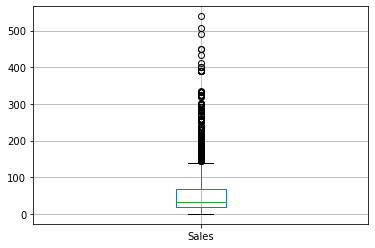

In [110]:
dfi.boxplot(column=['Sales'])
plt.show()

### Remove outliers using IQR

In [111]:
lrAge,urAge=remove_outlier(dfi['Age'])
dfi['Age']=np.where(dfi['Age']>urAge,urAge,dfi['Age'])
dfi['Age']=np.where(dfi['Age']<lrAge,lrAge,dfi['Age'])

lrCommision,urCommision=remove_outlier(dfi['Commision'])
dfi['Commision']=np.where(dfi['Commision']>urCommision,urCommision,dfi['Commision'])
dfi['Commision']=np.where(dfi['Commision']<lrCommision,lrCommision,dfi['Commision'])

lrDuration,urDuration=remove_outlier(dfi['Duration'])
dfi['Duration']=np.where(dfi['Duration']>urDuration,urDuration,dfi['Duration'])
dfi['Duration']=np.where(dfi['Duration']<lrDuration,lrDuration,dfi['Duration'])

lrSales,urSales=remove_outlier(dfi['Sales'])
dfi['Sales']=np.where(dfi['Sales']>urSales,urSales,dfi['Sales'])
dfi['Sales']=np.where(dfi['Sales']<lrSales,lrSales,dfi['Sales'])

dfi.shape

(3000, 10)

#### Make Boxplots after Outlier Treatment

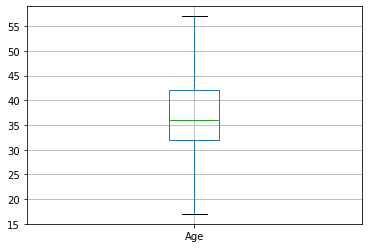

In [112]:
dfi.boxplot(column=['Age'])
plt.show()

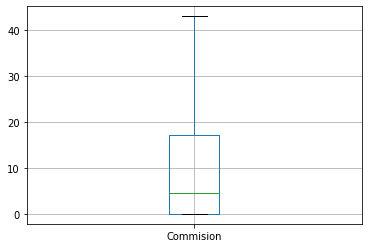

In [113]:
dfi.boxplot(column=['Commision'])
plt.show()

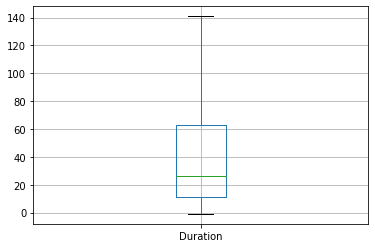

In [114]:
dfi.boxplot(column=['Duration'])
plt.show()

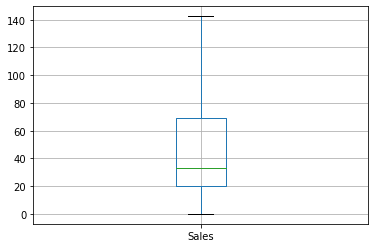

In [115]:
dfi.boxplot(column=['Sales'])
plt.show()

There are no outliers in all these columns now.

#### Check for missing value

In [116]:
dfi.isnull().sum()[dfi.isnull().sum()>0]

Series([], dtype: int64)

There are no missing values.

### Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

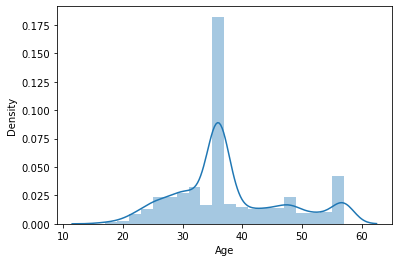

In [120]:
sns.distplot(dfi.Age, bins=20, kde=True)

From above figure, we can say that the Age parameter is right skewed

<AxesSubplot:xlabel='Commision', ylabel='Density'>

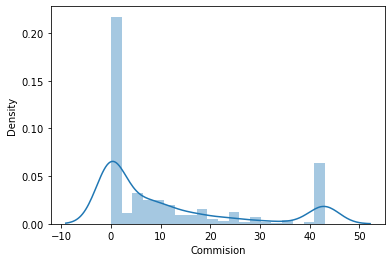

In [123]:
sns.distplot(dfi.Commision,bins=20, kde=True)

From above figure, we can say that the Commision parameter is right skewed

<AxesSubplot:xlabel='Duration', ylabel='Density'>

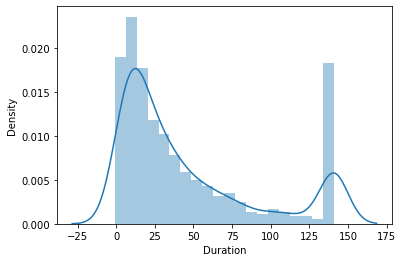

In [125]:
sns.distplot(dfi.Duration,bins=20, kde=True)

From above figure, we can say that the Duration parameter is right skewed

<AxesSubplot:xlabel='Sales', ylabel='Density'>

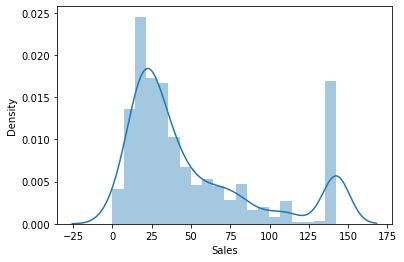

In [127]:
sns.distplot(dfi.Sales,bins=20, kde=True)

From above figure, we can say that the Sales parameter is right skewed

### Plots for Categorical Variables

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

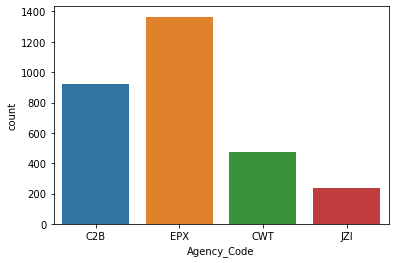

In [133]:
sns.countplot(x=dfi["Agency_Code"])

<AxesSubplot:xlabel='Type', ylabel='count'>

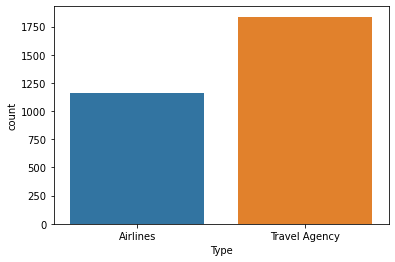

In [134]:
sns.countplot(x=dfi["Type"])

<AxesSubplot:xlabel='Claimed', ylabel='count'>

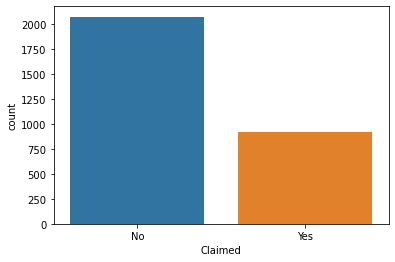

In [135]:
sns.countplot(x=dfi["Claimed"])

<AxesSubplot:xlabel='Channel', ylabel='count'>

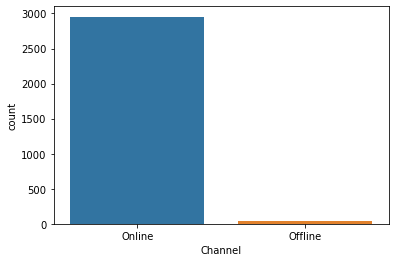

In [136]:
sns.countplot(x=dfi["Channel"])

<AxesSubplot:xlabel='Product Name', ylabel='count'>

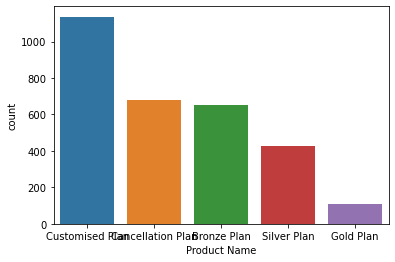

In [137]:
sns.countplot(x=dfi["Product Name"])

<AxesSubplot:xlabel='Destination', ylabel='count'>

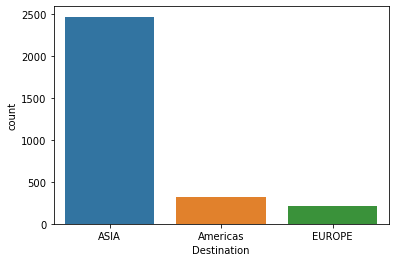

In [138]:
sns.countplot(x=dfi["Destination"])

### Bivariate Analysis

In [141]:
for feature in dfi.columns: 
    if dfi[feature].dtype == 'object': 
        dfi[feature] = pd.Categorical(dfi[feature]).codes
    print('feature:',feature)
    print(pd.Categorical(dfi[feature].unique()))


feature: Age
[48.0, 36.0, 39.0, 33.0, 45.0, ..., 54.0, 49.0, 17.0, 55.0, 18.0]
Length: 41
Categories (41, float64): [17.0, 18.0, 19.0, 20.0, ..., 54.0, 55.0, 56.0, 57.0]
feature: Agency_Code
[0, 2, 1, 3]
Categories (4, int64): [0, 1, 2, 3]
feature: Type
[0, 1]
Categories (2, int64): [0, 1]
feature: Claimed
[0, 1]
Categories (2, int64): [0, 1]
feature: Commision
[0.70, 0.00, 5.94, 6.30, 15.75, ..., 11.25, 2.81, 13.75, 12.00, 13.50]
Length: 251
Categories (251, float64): [0.00, 0.05, 0.09, 0.14, ..., 41.4400, 41.5800, 43.0600, 43.0875]
feature: Channel
[1, 0]
Categories (2, int64): [0, 1]
feature: Duration
[7.0, 34.0, 3.0, 4.0, 53.0, ..., 104.0, 139.0, 134.0, 137.0, 127.0]
Length: 139
Categories (139, float64): [-1.0, 0.0, 1.0, 2.0, ..., 137.0, 138.0, 139.0, 141.0]
feature: Sales
[2.51, 20.00, 9.90, 26.00, 18.00, ..., 0.32, 22.87, 68.60, 10.04, 19.87]
Length: 258
Categories (258, float64): [0.00, 0.19, 0.32, 0.51, ..., 137.5, 138.0, 138.6, 142.5]
feature: Product Name
[2, 1, 0, 4, 3]
Cat

In [142]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [143]:
dfi.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


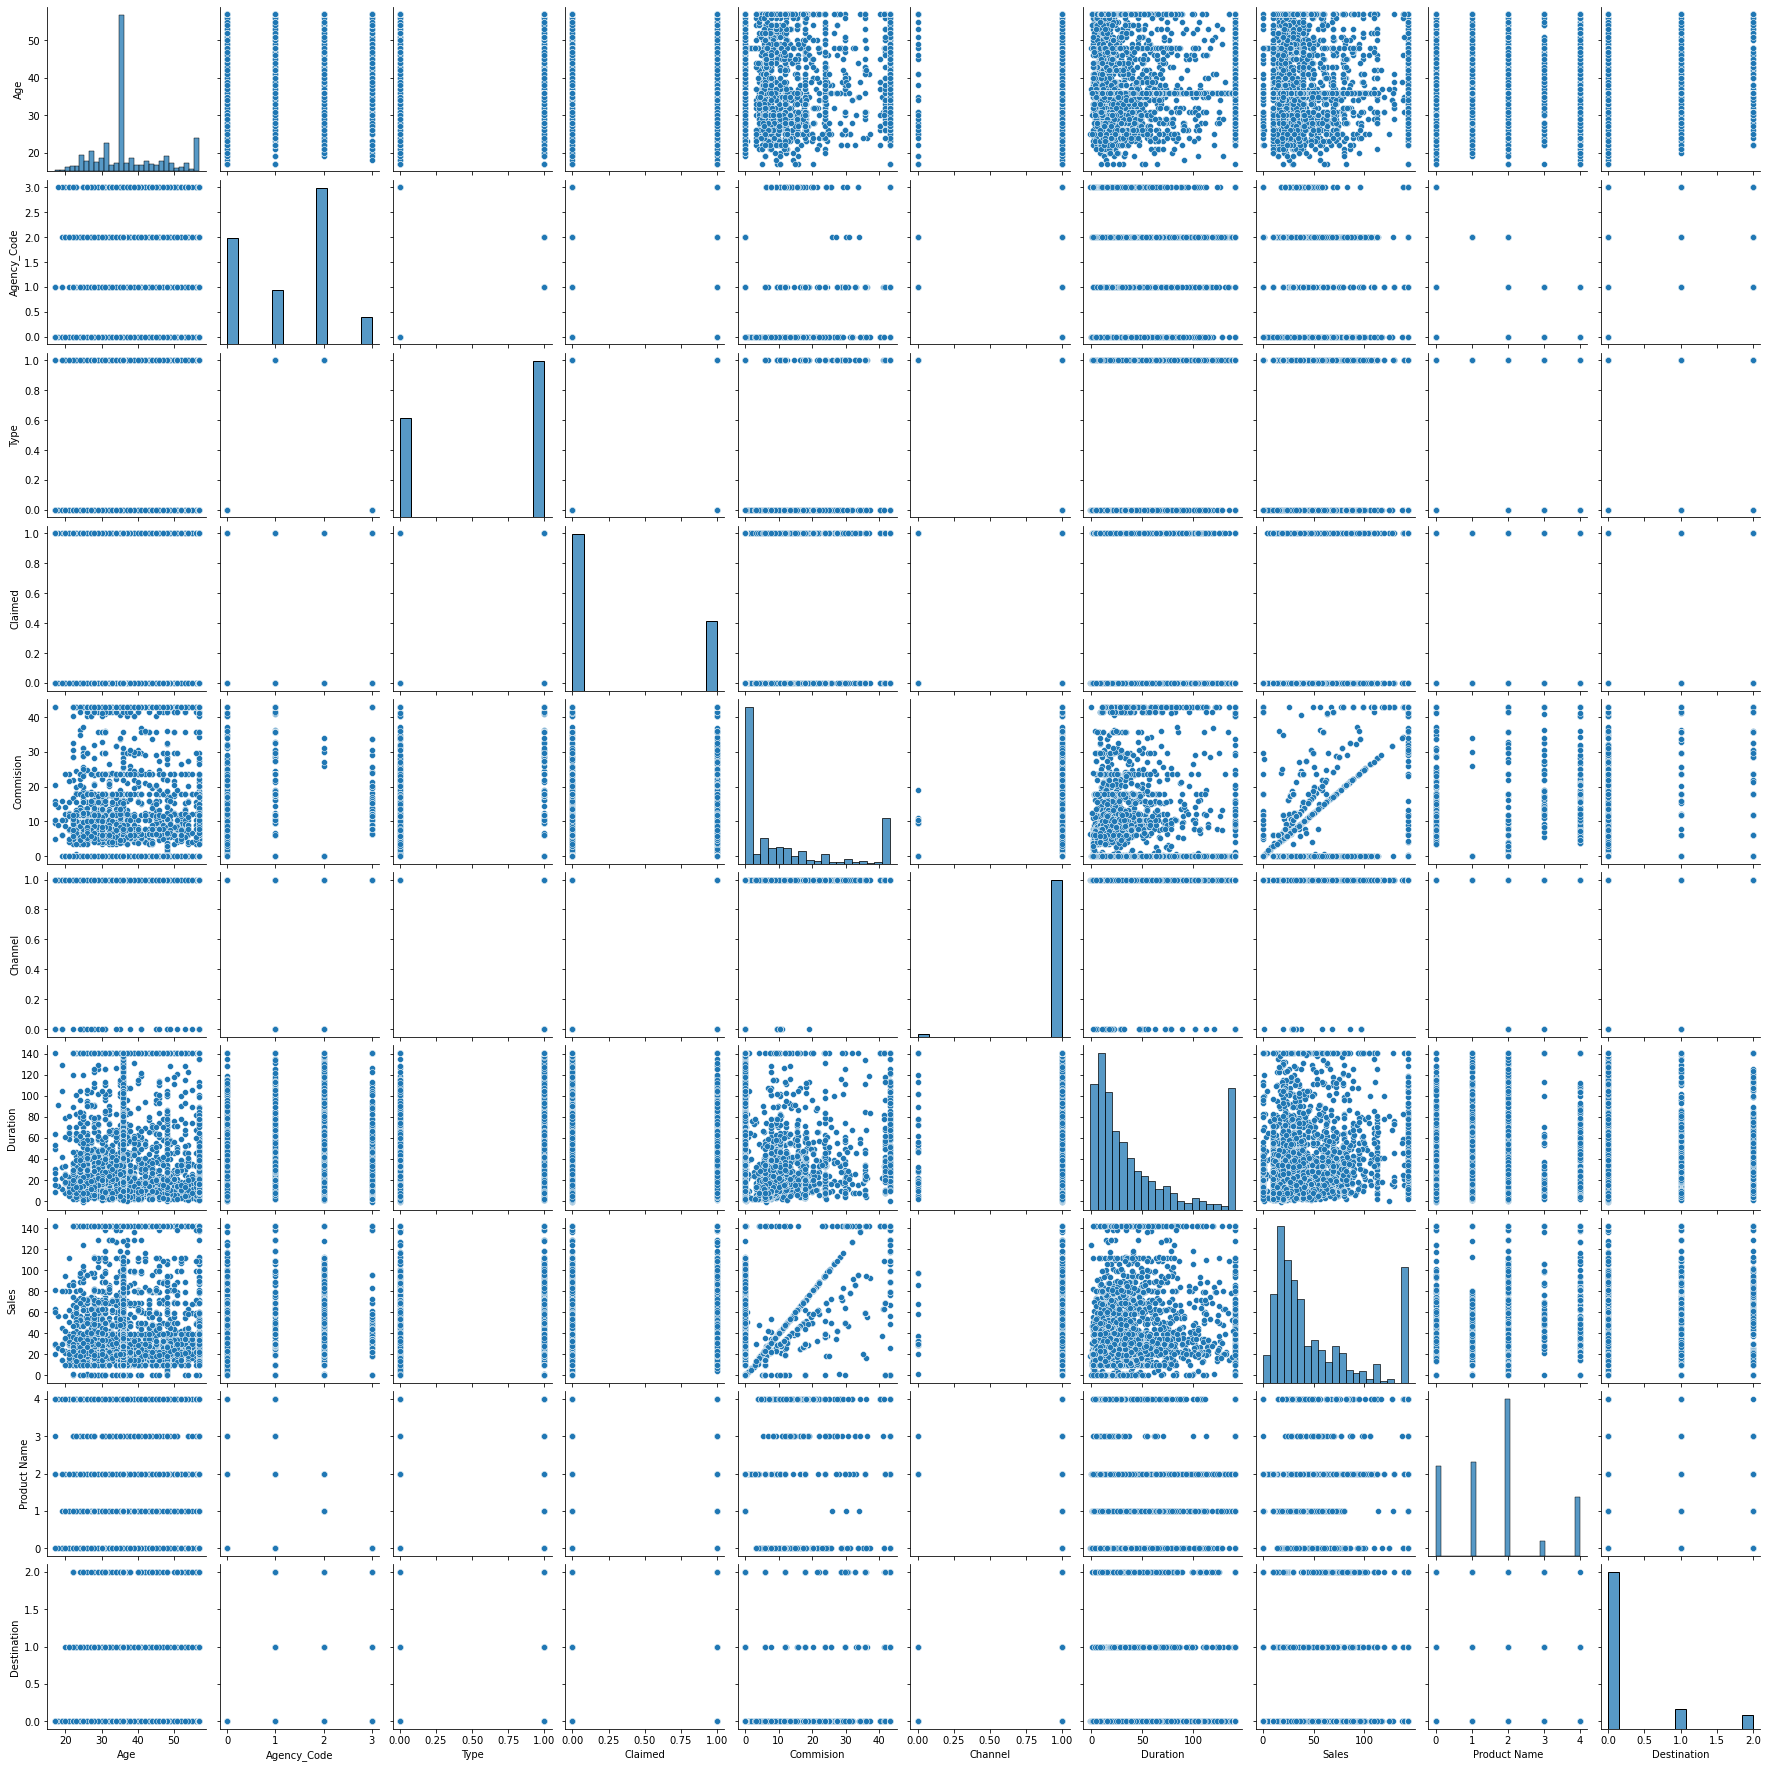

In [144]:
sns.pairplot(dfi)
plt.show()

#### A scatter plot  represents the degree of correlation between any two columns. Above plot is for all numerical and categorical variables.

### Multivariate Analysis

In [147]:
dfi.corr()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
Age,1.000000,0.040603,-0.040110,-0.043326,0.070513,-0.046717,0.013557,0.021783,0.016918,0.015038
Agency_Code,0.040603,1.000000,0.552247,-0.428647,-0.495343,0.022085,-0.181092,-0.313512,-0.379233,0.092274
Type,-0.040110,0.552247,1.000000,-0.343505,-0.330426,-0.099291,-0.136547,-0.200466,-0.008416,0.317289
Claimed,-0.043326,-0.428647,-0.343505,1.000000,0.334139,-0.016641,0.226533,0.349355,0.257951,-0.023851
Commision,0.070513,-0.495343,-0.330426,0.334139,1.000000,0.028908,0.458139,0.686219,0.423586,0.190315
Channel,-0.046717,0.022085,-0.099291,-0.016641,0.028908,1.000000,-0.037783,0.031833,-0.037859,0.035373
Duration,0.013557,-0.181092,-0.136547,0.226533,0.458139,-0.037783,1.000000,0.542815,0.335994,0.061051
Sales,0.021783,-0.313512,-0.200466,0.349355,0.686219,0.031833,0.542815,1.000000,0.456283,0.207459
Product Name,0.016918,-0.379233,-0.008416,0.257951,0.423586,-0.037859,0.335994,0.456283,1.000000,0.021528
Destination,0.015038,0.092274,0.317289,-0.023851,0.190315,0.035373,0.061051,0.207459,0.021528,1.000000


### Correlation Heatmap

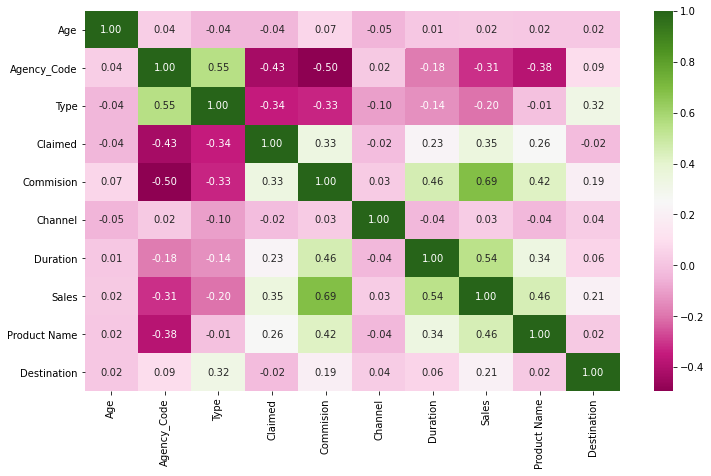

In [149]:
plt.figure(figsize=(12,7))
sns.heatmap(dfi.corr(), annot=True, fmt='.2f', cmap='PiYG')
plt.show()

There are mostly positive correlations between variables, and very few negative correlations. Significant correlation among independent attributes from high to low values

    Comision - Sales	0.69
    Agency code - Type	0.55
    Sales - Duration 0.54
    Duration - Comision	0.46
    Comision - Product name	0.42

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [150]:
dfi.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


### Extracting the target column into separate vectors for training set and test set

In [152]:
x = dfi.drop("Claimed" , axis=1)
y = dfi.pop("Claimed")

#### Splitting data into training and test set

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

#### Checking the dimensions of the training and test data

In [154]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2100, 9)
x_test (900, 9)
train_labels (2100,)
test_labels (900,)


----------------------------------------------------------------

### Building a Decision Tree Classifier

In [157]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5, 10,20,30,50],
    'min_samples_leaf': [10,15,30,45,100,150], 
    'min_samples_split': [100,150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid , cv = 10)

In [158]:
grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
best_grid_dt = grid_search.best_estimator_
best_grid_dt

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=150,
                       random_state=1)

#### Generating Tree

In [235]:
train_char_label = ['No', 'Yes']
dfi_Tree_File = open('I:\GL\dm\Final assesment\dfi_tree.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, out_file=dfi_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

dfi_Tree_File.close()
dot_data


---------------------------------------------------------------

### Building a Random Forest Classifier
#### Grid Search for finding out the optimal values for the hyper parameters

In [179]:
param_grid = {
    'max_depth': [5,10,20,30,50],
    'max_features': [3,4,5,6],
    'min_samples_leaf': [10,15,30,45,100,150],
    'min_samples_split': [100,150,300,450],
    'n_estimators': [300,100,200]

}

rfcl = RandomForestClassifier(random_state=1)

grid_search1 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [180]:
grid_search1.fit(x_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 20, 30, 50],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 15, 30, 45, 100, 150],
                         'min_samples_split': [100, 150, 300, 450],
                         'n_estimators': [300, 100, 200]})

In [182]:
grid_search1.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 100}

In [183]:
best_grid_rf = grid_search1.best_estimator_

In [184]:
best_grid_rf

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=10,
                       min_samples_split=100, random_state=1)

### Building a Neural Network Classifier

#### Scale on the dataset

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
sc = StandardScaler()

In [188]:
x_train1 = sc.fit_transform(x_train)

In [189]:
x_train1

array([[-0.16645631,  0.72815922,  0.80520286, ..., -0.71237139,
         0.24642411, -0.43926017],
       [-0.16645631,  0.72815922,  0.80520286, ..., -0.1975992 ,
         0.24642411,  1.27851702],
       [-1.05932541, -1.28518425, -1.24192306, ...,  2.15397374,
         1.83381865, -0.43926017],
       ...,
       [-0.16645631,  0.72815922,  0.80520286, ...,  0.29377425,
         0.24642411, -0.43926017],
       [ 0.72641279,  1.73483096, -1.24192306, ..., -0.75916886,
        -1.34097044, -0.43926017],
       [-0.16645631, -1.28518425, -1.24192306, ..., -0.65387455,
         1.83381865, -0.43926017]])

In [190]:
x_test1 = sc.transform(x_test)

In [191]:
x_test1

array([[-1.72897723, -0.27851251,  0.80520286, ...,  0.57455908,
        -1.34097044,  2.99629421],
       [ 1.95410779, -1.28518425, -1.24192306, ..., -0.56027961,
        -1.34097044, -0.43926017],
       [-0.94771677, -1.28518425, -1.24192306, ..., -0.80596633,
        -1.34097044, -0.43926017],
       ...,
       [-0.16645631, -1.28518425, -1.24192306, ..., -0.54858024,
        -1.34097044, -0.43926017],
       [ 1.28445597,  1.73483096, -1.24192306, ..., -0.47838403,
        -1.34097044, -0.43926017],
       [-0.27806495,  1.73483096, -1.24192306, ..., -0.57197898,
        -1.34097044, -0.43926017]])

#### Predicting the Training and Testing data

In [192]:
param_grid = {
    'hidden_layer_sizes': [25, 50, 100, 150],
    'max_iter': [2500, 5000],
    'solver': ['adam', 'sgd'],
    'tol': [0.1, 0.01, 0.001], 
}

nncl = MLPClassifier(random_state=1)

grid_search2 = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [193]:
grid_search2.fit(x_train1, train_labels)
grid_search2.best_params_

{'hidden_layer_sizes': 150, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.001}

In [194]:
best_grid_nn = grid_search2.best_estimator_
best_grid_nn

MLPClassifier(hidden_layer_sizes=150, max_iter=2500, random_state=1, tol=0.001)

---------------------------------------

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

### Decision Tree - Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports

#### Predicting on Training and Test dataset
#### Getting the Predicted Classes and Probs

In [195]:
ytrain_predict = best_grid_dt.predict(x_train)
ytest_predict = best_grid_dt.predict(x_test)
ytest_predict_prob=best_grid_dt.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.539474,0.460526
2,0.539474,0.460526
3,0.182482,0.817518
4,0.909722,0.090278


### Model Evaluation
#### AUC and ROC for the training data

AUC: 0.848


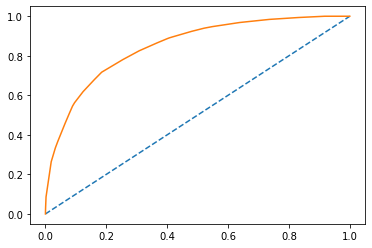

In [196]:
# predict probabilities
probs = best_grid_dt.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)


#### AUC and ROC for the test data

AUC: 0.798


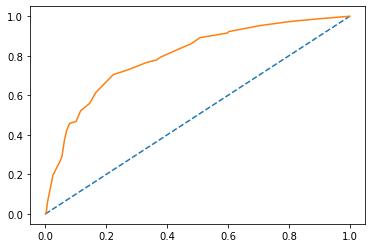

In [197]:
# predict probabilities
probs = best_grid_dt.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

#### Confusion Matrix for the training data

In [198]:
confusion_matrix(train_labels, ytrain_predict)

array([[1330,  141],
       [ 275,  354]], dtype=int64)

In [199]:
cart_train_acc=best_grid_dt.score(x_train,train_labels)
cart_train_acc

0.8019047619047619

#### Classification report

In [200]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.72      0.56      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [201]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
dfi2=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(dfi2.loc["1"][2],2)
cart_train_recall=round(dfi2.loc["1"][1],2)
cart_train_precision=round(dfi2.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.72
cart_train_recall  0.56
cart_train_f1  0.63


#### Confusion Matrix for test data

In [202]:
confusion_matrix(test_labels, ytest_predict)

array([[544,  61],
       [157, 138]], dtype=int64)

In [203]:
cart_test_acc=best_grid_dt.score(x_test,test_labels)
cart_test_acc

0.7577777777777778

#### Classification report

In [204]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       605
           1       0.69      0.47      0.56       295

    accuracy                           0.76       900
   macro avg       0.73      0.68      0.70       900
weighted avg       0.75      0.76      0.74       900



In [205]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
dfi2=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(dfi2.loc["1"][0],2)
cart_test_recall=round(dfi2.loc["1"][1],2)
cart_test_f1=round(dfi2.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.69
cart_test_recall  0.47
cart_test_f1  0.56


#### Variable Importance

In [206]:
print (pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.550220
Sales         0.246708
Product Name  0.070281
Duration      0.068561
Age           0.028870
Commision     0.028553
Type          0.006808
Channel       0.000000
Destination   0.000000


### Cart Conclusion

Train Data:   
AUC: 84.8%   
Accuracy: 80%   
Precision: 72%   
f1-Score: 63%   
Recall: 56%   

Test Data:   
AUC: 79.8%   
Accuracy: 76%    
Precision: 69%   
f1-Score: 56%  
Recall: 47%   

#### Agency_Code, Sales, Product Name and Duration are the most important variables in determining claim status.

-----------------------------------------------------------------------

### RF Model - Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports

#### Predicting on Training and Test dataset

In [207]:
ytrain_predict_rf = best_grid_rf.predict(x_train)
ytest_predict_rf = best_grid_rf.predict(x_test)

### RF Model Performance Evaluation on Training data

#### Confusion matrix on training data

In [208]:
confusion_matrix(train_labels,ytrain_predict_rf)

array([[1320,  151],
       [ 258,  371]], dtype=int64)

In [209]:
rf_train_acc=best_grid_rf.score(x_train,train_labels) 
rf_train_acc

0.8052380952380952

#### Classification report

In [210]:
print(classification_report(train_labels,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.71      0.59      0.64       629

    accuracy                           0.81      2100
   macro avg       0.77      0.74      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [211]:
rf_metrics=classification_report(train_labels, ytrain_predict_rf,output_dict=True)
dfi3=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(dfi3.loc["1"][0],2)
rf_train_recall=round(dfi3.loc["1"][1],2)
rf_train_f1=round(dfi3.loc["1"][2],2)
print ('rf_train_precision',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_train_precision 0.71
rf_train_recall 0.59
rf_train_f1 0.64


#### AUC and ROC for the training data

Area under Curve is 0.842776995414257


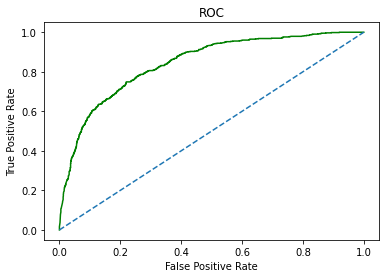

In [212]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rf.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rf.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

#### Confusion matrix on test data

In [213]:
confusion_matrix(test_labels,ytest_predict_rf)

array([[553,  52],
       [151, 144]], dtype=int64)

In [214]:
rf_test_acc=best_grid_rf.score(x_test,test_labels)
rf_test_acc

0.7744444444444445

#### Classification report

In [215]:
print(classification_report(test_labels,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.73      0.49      0.59       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900



In [216]:
rf_metrics=classification_report(test_labels, ytest_predict_rf,output_dict=True)
dfi3=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(dfi3.loc["1"][0],2)
rf_test_recall=round(dfi3.loc["1"][1],2)
rf_test_f1=round(dfi3.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.49
rf_test_f1  0.59


#### AUC and ROC for the test data

Area under Curve is 0.8169379464911052


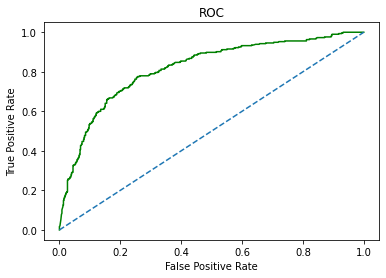

In [217]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rf.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rf.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

#### Variable Importance

In [218]:
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.357006
Product Name  0.194768
Sales         0.158406
Commision     0.129381
Type          0.065347
Duration      0.051936
Age           0.033919
Destination   0.008663
Channel       0.000576


### Random Forest Conclusion

Compare the model performance and give the interpretations

Train Data:   
AUC: 84%   
Accuracy: 80%   
Precision: 71%   
f1-Score: 64%   
Recall: 59%  

Test Data:  
AUC: 81.69%  
Accuracy: 77%  
Precision: 73%  
f1-Score: 59%  
Recall: 49%   

#### Agency_Code, Sales, Product Name and Commision are the most important variables in determining claim status.

------------------------------------------------------------------------------------------------------

### ANN Model - Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports

#### Predicting the Training and Testing data

In [219]:
ytrain_predict_nn = best_grid_nn.predict(x_train1)
ytest_predict_nn = best_grid_nn.predict(x_test1)

### ANN Model Performance Evaluation on Training data

#### Confusion matrix on training data

In [220]:
confusion_matrix(train_labels,ytrain_predict_nn)

array([[1328,  143],
       [ 295,  334]], dtype=int64)

In [221]:
nn_train_acc=best_grid_nn.score(x_train1,train_labels) 
nn_train_acc

0.7914285714285715

#### Classification report

In [222]:
print(classification_report(train_labels,ytrain_predict_nn))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.70      0.53      0.60       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [223]:
nn_metrics=classification_report(train_labels, ytrain_predict_nn, output_dict=True)
dfi4=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(dfi4.loc["1"][0],2)
nn_train_recall=round(dfi4.loc["1"][1],2)
nn_train_f1=round(dfi4.loc["1"][2],2)
print ('nn_train_precision',nn_train_precision)
print ('nn_train_recall',nn_train_recall)
print ('nn_train_f1',nn_train_f1)

nn_train_precision 0.7
nn_train_recall 0.53
nn_train_f1 0.6


#### AUC and ROC for the training data

Area under Curve is 0.8318589713799056


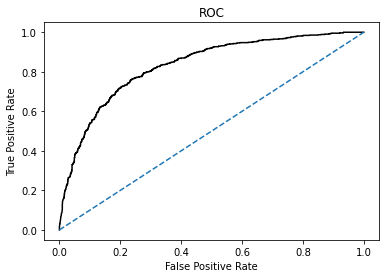

In [224]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nn.predict_proba(x_train1)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nn.predict_proba(x_train1)[:,1])
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

#### Confusion matrix on test data

In [225]:
confusion_matrix(test_labels,ytest_predict_nn)

array([[555,  50],
       [162, 133]], dtype=int64)

In [226]:
nn_test_acc=best_grid_nn.score(x_test1,test_labels) 
nn_test_acc

0.7644444444444445

#### Classification report

In [227]:
print(classification_report(test_labels,ytest_predict_nn))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.45      0.56       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.75       900



In [228]:
nn_metrics=classification_report(test_labels, ytest_predict_nn, output_dict=True)
dfi4=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(dfi4.loc["1"][0],2)
nn_test_recall=round(dfi4.loc["1"][1],2)
nn_test_f1=round(dfi4.loc["1"][2],2)
print ('nn_test_precision',nn_test_precision)
print ('nn_test_recall',nn_test_recall)
print ('nn_test_f1',nn_test_f1)

nn_test_precision 0.73
nn_test_recall 0.45
nn_test_f1 0.56


#### AUC and ROC for the test data

Area under Curve is 0.811113601344726


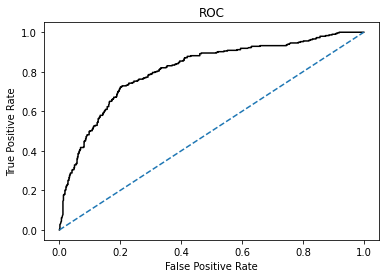

In [229]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nn.predict_proba(x_test1)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nn.predict_proba(x_test1)[:,1])
print('Area under Curve is', nn_test_auc)

In [230]:
best_grid_nn.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=150, max_iter=2500, random_state=1, tol=0.001)>

### ANN Conclusion

Compare the model performance and give the interpretations

Train Data:    
AUC: 83.18%    
Accuracy: 79%        
Precision: 70%   
f1-Score: 60%   
Recall: 53%

Test Data:   
AUC: 81%   
Accuracy: 76%     
Precision: 73%    
f1-Score: 56%  
Recall: 45%

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.
### Comparison of the performance metrics from the 3 models

In [231]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.76,0.81,0.77,0.79,0.76
AUC,0.85,0.80,0.84,0.82,0.83,0.81
Recall,0.56,0.47,0.59,0.49,0.53,0.45
Precision,0.72,0.69,0.71,0.73,0.70,0.73
F1 Score,0.63,0.56,0.64,0.59,0.60,0.56


### ROC Curve for the 3 models on the Training data

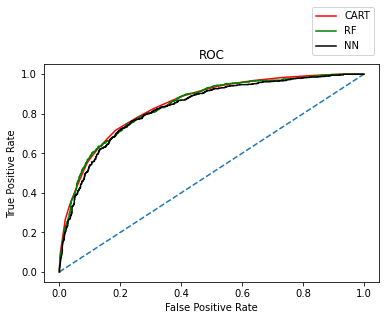

In [232]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

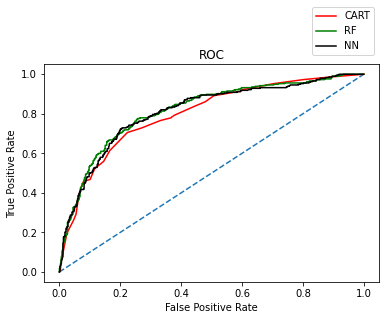

In [233]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance on both train and test data than the Cart and Neural network model. It has better precsion, recall, f1 score than other two models.

## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

#### Business insights
 - As per the analysis 98% of the insurance is done by online.
 - Out of claimed insurance 98% is done via online. Here we can state that online gives good customer experience.
 - In offline process 17 are claimed and 29 are not claimed.
 - Out of 4 agencies (C2B-924, EPX-1365, CWT-472, JZI-239) JZI agency has low sales. So, need to suggest to run a promotional campaign or need to tie up with some other agency. Also need to focus bit on CWT agency sales.
 - As per the selling data, ~62% tickets are sold via agency and ~38% via Airlines but there are high claims in Airlines. Need to do deep analysis on it to get best solution.
 - Sales is high (96416.67) for Airlines compared with agencies (84333.07).
 - We get 81% accuracy on the dataset. We need to sell the tickets via airlines based on the cliaim status.
 - Increase customer satisfaction that will give more revenue by reducing the claim costs
 - Need to decrease claim processing time. 

#### Recommendations
Looking at the models, these 3 are little bit similer. More data will help to understand and predict the better model. Also the high number of variables such as vehicle, incident, location and time details would be useful to get best prediction.